# Prediction using Unsupervised ML

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## loading data

In [2]:
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view" #link of file
file_id = url.split('/')[-2] # extracting the id of file
dwnld_url = "https://drive.google.com/uc?id=" + file_id # making the downloading file
df = pd.read_csv(dwnld_url) # read file
df # show data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocessing

In [3]:
df.info() # look at the characteristics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
X = df.drop(columns = ['Id', 'Species']) # deleting the unnecessary columns
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


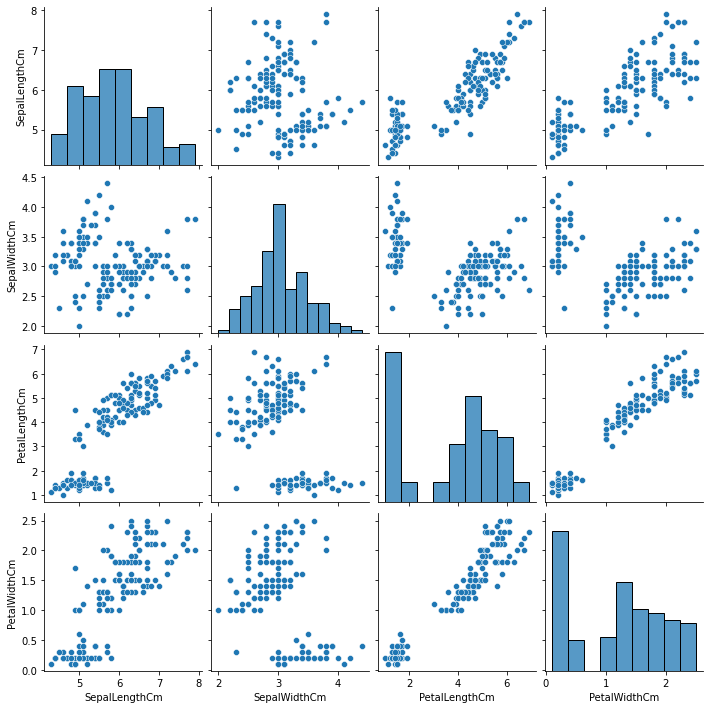

In [5]:
sns.pairplot(X); # plotting data, every pair together

By looking at SepalWidthCm/SepalLengthCm graph I think we may partetion the data into 3 clusters

Let's make sure

In [6]:
X.describe() # I want to know the range of every column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By looknig at min/max of every column we found that we need to normalize our data since they aren't in the same range

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Standard Scaling

## Find the optimum number of clusters

C:\Users\Mahmoud\anaconda3\envs\SPARK\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


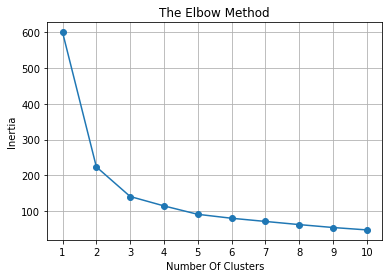

In [8]:
WCSS = []
n_clusters = range(1,11,1)
for i in n_clusters:
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(X_scaled)
    WCSS.append(KM.inertia_)
plt.plot(n_clusters, WCSS, marker='o')
plt.xticks(n_clusters);
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia")
plt.grid();

from the "Elbow" method '3' is the number positioned at the elobow of the curve

# Then '3' is the optimum number of clusters

## Make The optimum model and Predict

In [9]:
KM = KMeans(n_clusters=3, random_state=0)
prediction = KM.fit_predict(X_scaled)
cluster_centers_ = scaler.inverse_transform(KM.cluster_centers_)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
pd.crosstab(prediction, df.Species)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


The above table shows clusters corresponding to Species

## Visualizing

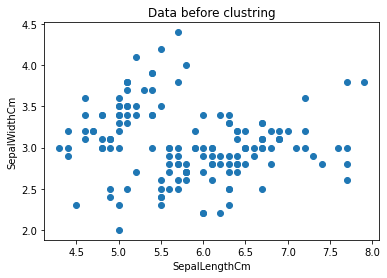

In [11]:
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'])
plt.title('Data before clustring')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm');

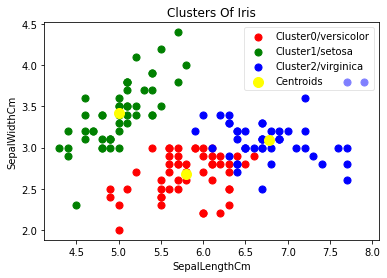

In [13]:
plt.scatter(X.loc[prediction == 0,'SepalLengthCm'],X.loc[prediction == 0, 'SepalWidthCm'], color='red', s=50, label= 'Cluster0/versicolor')
plt.scatter(X.loc[prediction == 1,'SepalLengthCm'],X.loc[prediction == 1, 'SepalWidthCm'], color='green', s=50, label= 'Cluster1/setosa')
plt.scatter(X.loc[prediction == 2,'SepalLengthCm'],X.loc[prediction == 2, 'SepalWidthCm'], color='blue', s=50, label= 'Cluster2/virginica')
plt.scatter(cluster_centers_[:,0], cluster_centers_[:,1], color='yellow', s=100, label='Centroids')
plt.title('Clusters Of Iris')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(framealpha=0.5);

# Created by Mahmoud M. H. Moawad